## Find the Gaussian Pyramids for apple and orange
![](https://i.imgur.com/ge4QnCU.png)

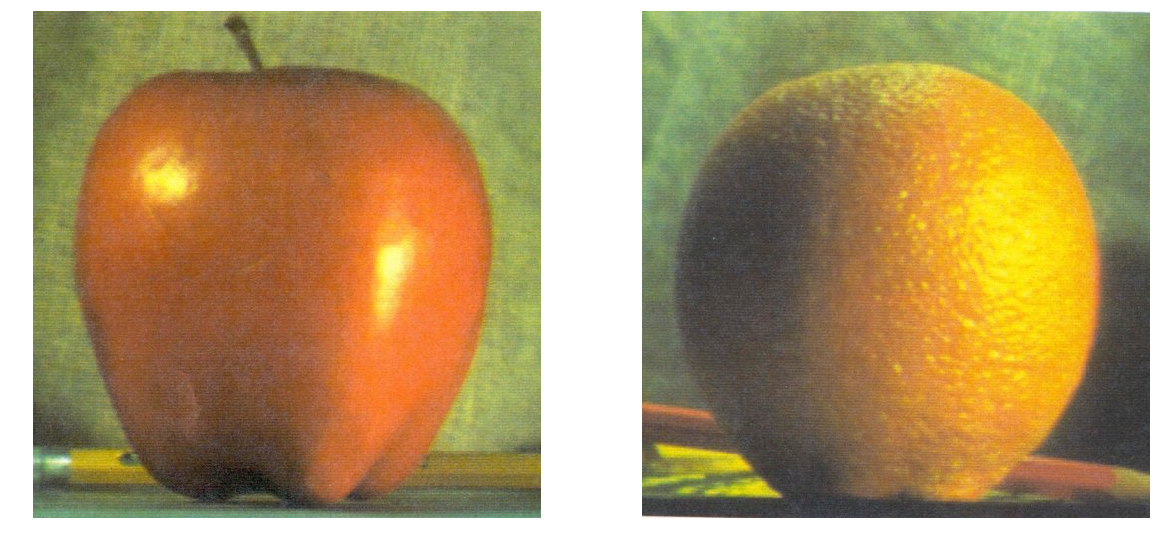

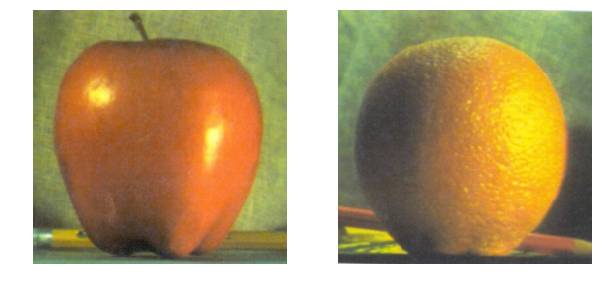

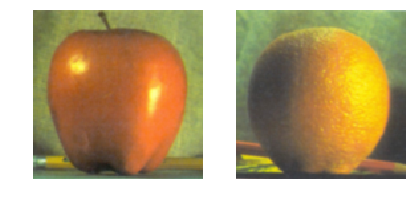

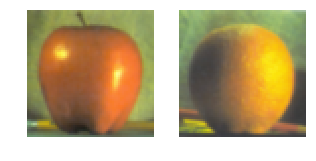

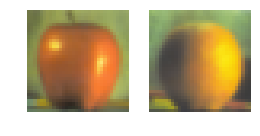

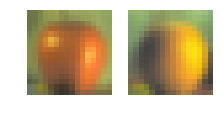

In [54]:
import cv2
import numpy as np,sys
import matplotlib.pyplot as plt

A = cv2.imread('apple.jpg')
B = cv2.imread('orange.jpg')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

#===================show image, not important===========================

for i in range(6):
    plt.figure(figsize=(20/(i+1),40/(i+1)))
    plt.subplot(1,2,1)
    img_rgb = cv2.cvtColor(gpA[i], cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img_rgb)
    plt.subplot(1,2,2)
    plt.axis('off')
    img_rgb = cv2.cvtColor(gpB[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)



## From Gaussian Pyramids, find their Laplacian Pyramids

![](https://i.imgur.com/ge4QnCU.png)

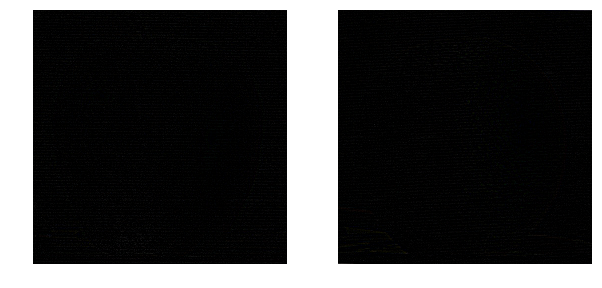

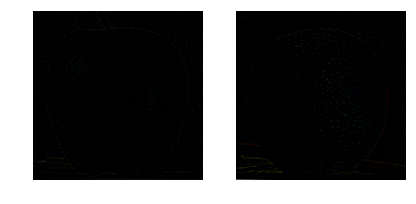

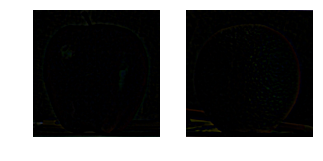

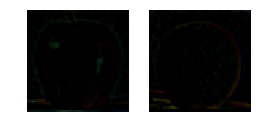

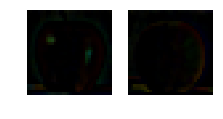

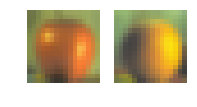

In [45]:

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

#===================show image, not important===========================

for i in range(5,-1,-1):
    plt.figure(figsize=(20/((6-i)+1),40/((6-i)+1)))
    plt.subplot(1,2,1)
    img_rgb = cv2.cvtColor(lpA[i], cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img_rgb)
    plt.subplot(1,2,2)
    plt.axis('off')
    img_rgb = cv2.cvtColor(lpB[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

## Join the left half of apple and right half of orange in each levels of Laplacian Pyramids

![](https://i.imgur.com/ge4QnCU.png)

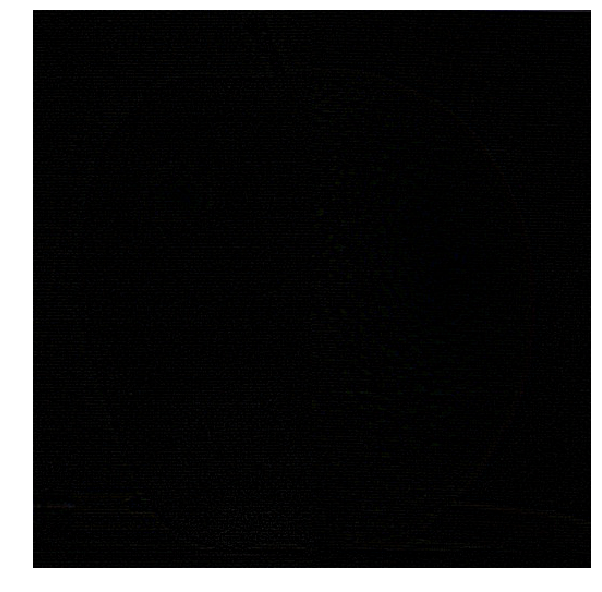

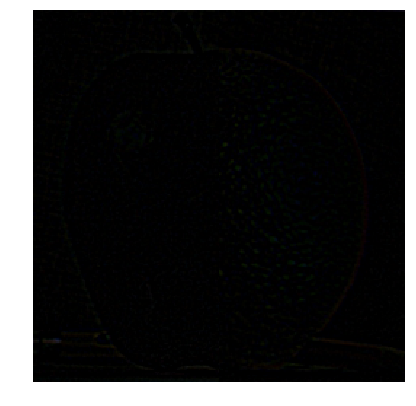

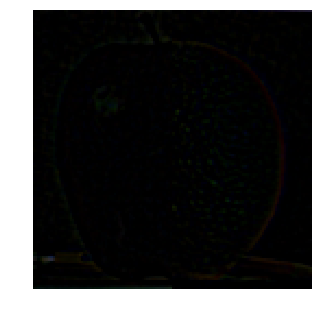

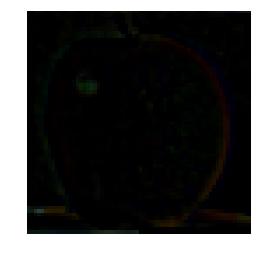

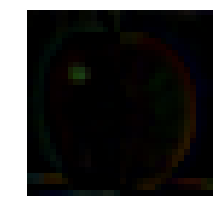

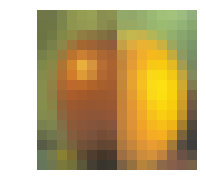

In [49]:
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
    
for i in range(5,-1,-1):
    plt.figure(figsize=(20/((6-i)+1),40/((6-i)+1)))
    img_rgb = cv2.cvtColor(LS[i], cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img_rgb)

## Finally from this joint image pyramids, reconstruct the original image.![image.png]

![](https://i.imgur.com/ge4QnCU.png)

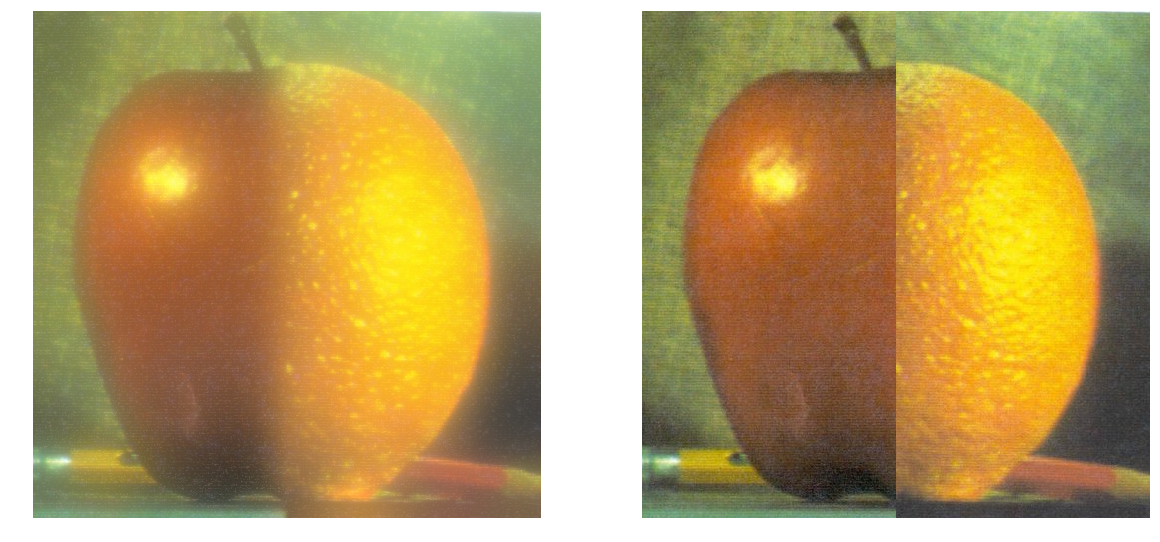

In [64]:

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
img_rgb = cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.axis('off')
img_rgb = cv2.cvtColor(real, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)